In [1]:
import geopandas as gpd
import pandas as pd
import osmnx as ox
import plotly.express as px
import contextily as ctx
import matplotlib.pyplot as plt

# Manufactured Homes in the United States
Manufactured homes are an alternative form of homeownership that could allow for a new opportunity for marginalized communities trying to enter the home market. Unfortunately, manufactured home lending is equally restrictive as single family homes but we do not understand to what extent. Land plays a crucial role for manfucature home lenders since two loans exist, a loan for the home and the land it sits on or a loan for the home but not the land. This dichotomoy leads to racial disparities across borrowers. This data set will frist explore what loan outcome results are fro manufactured homes and asses dipsarities exist among ethno-racial groups. 

In [2]:
df =pd.read_csv(
    'Data/Mobile Homes.csv',
    dtype=
    {
        'census_tract':str,
        'FIPS':str
    }
)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df.shape

(3242, 10)

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   activity_year                     3242 non-null   int64  
 1   census_tract                      3242 non-null   object 
 2   manufactured_home_secured_proper  3242 non-null   int64  
 3   manufactured_home_land_property_  3242 non-null   int64  
 4   race                              3242 non-null   int64  
 5   age                               3242 non-null   int64  
 6   white_pop                         3242 non-null   float64
 7   census_income                     3242 non-null   float64
 8   loan_outcome                      3242 non-null   int64  
 9   FIPS                              3242 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 253.4+ KB


In [6]:
loan_outcome=df['loan_outcome'].value_counts()
loan_outcome=loan_outcome.reset_index()
loan_outcome

,index,loan_outcome
0,3,1705
1,2,1215
2,1,322


In [7]:
loan_outcome.columns = ['loan outcome', 'count']
loan_outcome

,loan outcome,count
0,3,1705
1,2,1215
2,1,322


In [9]:
def loan_label(row):
    if row['loan_outcome'] ==1:
        val = 'Loan Origination'
    elif row['loan_outcome'] ==2:
        val = 'High Cost Loan'
    else:
        val = 'Loan Denial'
    return val

df['loan_outcome'] = df.apply(loan_label, axis=1)

In [10]:
loan_outcome=df['loan_outcome'].value_counts()
loan_outcome=loan_outcome.reset_index()
loan_outcome

,index,loan_outcome
0,Loan Denial,1705
1,High Cost Loan,1215
2,Loan Origination,322


In [11]:
loan_outcome.columns = ['loan outcome', 'count']
loan_outcome

,loan outcome,count
0,Loan Denial,1705
1,High Cost Loan,1215
2,Loan Origination,322


<AxesSubplot: title={'center': 'Manufactured Home Loan Outcomes'}, xlabel='loan outcome'>

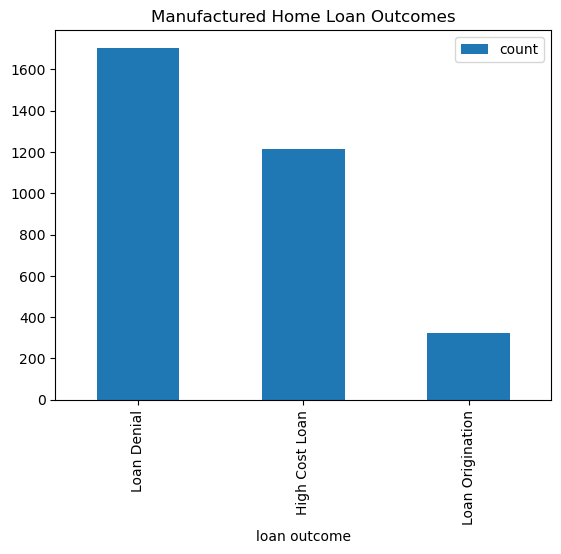

In [12]:
loan_outcome.plot.bar(x='loan outcome', y='count',title='Manufactured Home Loan Outcomes')